## Nick Personal Notebook 

## Grocery Stores
Grocery Stores/Supermarkets are the essential part of this view of the city. When we are judging how accessible fresh food, such as fruits and vegetables, is to people, access to grocery stores is the prime factor. When a person is able to easily access a grocery store, they are able to keep their options open for healthy eating. We used this dataset in our analysis by running a program through the WPRDC’s dataset to see how many grocery stores were in each zip code area. After that, we transferred these numbers to a spreadsheet to compare it with data from more datasets we used to make a conclusion. Unsurprisingly, the more grocery stores a zip code had, the more highly it was ranked.

*Most - East Liberty*

In [1]:
#top 5 Grocery Stores
import geopandas as gpd
csv = gpd.read_file('13 neighborhoods.csv')
csv.sort_values(by=['Number Grocery Stores'], ascending=False).head(5)

,ZIP Code,Neighborhood,Population,Number Fast Food,Fast Food Per Capita,Number Grocery Stores,Fast Food/Grocery Ratio,Grocery Store Per Capita,geometry
2,15206,East Liberty,05869,11,0.00711974110032363,4,11:4,0.00258899676375405,None
3,15210,St. Clair,03994,11,0.00275413119679519,4,11:4,0.00100150225338007,None
7,15217,Squirrel Hill South,15317,20,0.00130573872168179,4,20:4,0.000261147744336358,None
9,15222,Troy Hill,05458,46,0.0084279956027849,4,46:4,0.000732869182850861,None
4,15212,Perry South,03765,09,0.00239043824701195,3,9:3,0.000796812749003984,None


*Least - Manchester*

In [2]:
#bottom 5 Grocery Stores
import geopandas as gpd
csv = gpd.read_file('13 neighborhoods.csv')
csv.sort_values(by=['Number Grocery Stores'], ascending=True).head(5)

,ZIP Code,Neighborhood,Population,Number Fast Food,Fast Food Per Capita,Number Grocery Stores,Fast Food/Grocery Ratio,Grocery Store Per Capita,geometry
12,15233,Manchester,02130,04,0.00187793427230047,0,4:0,0,None
0,15201,Central Lawrenceville,04720,05,0.00105932203389831,1,5:1,0.000211864406779661,None
8,15219,Central Business District,05477,27,0.00492970604345445,1,27:1,0.000182581705313128,None
11,15232,Shadyside,15317,12,0.000783443233009075,1,12:1,6.52869360840896E-05,None
1,15203,South Side Slopes,04327,19,0.00439103304830136,2,19:2,0.000462214005084354,None


## Finding Grocery Store Score

North Oakland: 0.10838555794593546
East Liberty: 1.0
Manchester: 0.0
Central Business District: 0.07052218367719555
South Side Slopes: 0.1785301594638314
Bloomfield: 0.13372763993075554
Banksville: 0.18718197237702897
Central Lawrenceville: 0.08183262711864392
Troy Hill: 0.2830707218761445
St. Clair: 0.38683024536805133
Shadyside: 0.02521707906247956
Squirrel Hill South: 0.10086831624991809
Perry South: 0.30776892430278824


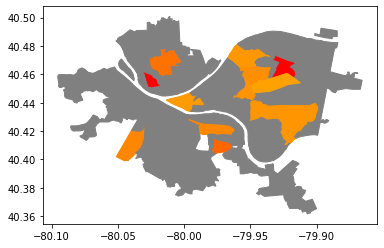

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
try:
    from colour import Color
except:
    print("make sure to do pip install colour. you also need to restart your kernel after you install the pacakge")
    quit()
    
#create list of 1000 colors that gradient from red to orange, the more red, the higher the score
orange_red = list((Color("orange").range_to(Color("red"),1000)))
colors = orange_red

#importing data
neighborhoodPitt = gpd.read_file('pittsburghpaneighborhoods-.geojson')["geometry"]
neighborhoodnamePitt = gpd.read_file('pittsburghpaneighborhoods-.geojson')["hood"]
csv = gpd.read_file('bigideas_finalprojdata.csv')


data_list = ["Banksville", "Bloomfield", "Central Business District", "Central Lawrenceville", "East Liberty", "Manchester", "North Oakland", "Perry South", "Shadyside", "South Side Slopes", "Squirrel Hill South", "St. Clair", "Troy Hill"]

#find min and max values for score normalization
maxFFGroc = 0
minFFGroc = 10000

for i in range(len(csv["Grocery Store Per Capita"])):
    if float(csv["Grocery Store Per Capita"][i]) < minFFGroc:
        minFFGroc = eval(csv["Grocery Store Per Capita"][i])
    if float(csv["Grocery Store Per Capita"][i]) > maxFFGroc:
        maxFFGroc = eval(csv["Grocery Store Per Capita"][i])

#GSPC
for i in range(len(neighborhoodPitt)):
    try:
        if (neighborhoodnamePitt[i]in data_list) == True:
            shape = neighborhoodPitt[i]
            hoodData = csv.loc[csv['Neighborhood'] == neighborhoodnamePitt[i]]
            weight = float(hoodData["Grocery Store Per Capita"]) / maxFFGroc #find the grocery store locations per captia and divides it by the max fast food per captia number to get a normalized score
            print(str(neighborhoodnamePitt[i]) + ": " + (str(weight)))
            fill_color = str(colors[int(weight * 1000) - 1]).upper()#chooses color of neighborhood based on normalized score
            
            #plots nieghborhood
            x,y = shape.exterior.xy
            plt.plot(x, y, linestyle="None")
            plt.fill(x, y, color=fill_color)
        else:
            #plots neighborhood in gray is no data is available
            shape = neighborhoodPitt[i]
            x,y = shape.exterior.xy
            plt.plot(x, y, linestyle="None")
            plt.fill(x, y, color="grey")
    except:
        for x in range(len(neighborhoodPitt[i])):
            #plots neighborhood in gray is no data is available
            shape = neighborhoodPitt[i][x]
            fill_color = str(colors[int(weight * 1000) - 1]).upper()
            x,y = shape.exterior.xy
            plt.plot(x, y, linestyle="None")
            plt.fill(x, y, color="grey")

plt.show()

## Population
Population was essential to our data analysis. By taking the population of a certain neighborhood and dividing it by the other two metrics independently, we were able to determine a ‘per capita’ ratio of both grocery stores and fast food establishments. We determined an establishment is most viable when it is easily accessible to the population that directly serves. This is why we used the population metric to look at how these establishments can affect their communities.

*Most - Squirrel Hill South*

In [10]:
#top 5 population
import geopandas as gpd
csv = gpd.read_file('13 neighborhoods.csv')
csv.sort_values(by=['Population'], ascending=False).head(5)

,ZIP Code,Neighborhood,Population,Number Fast Food,Fast Food Per Capita,Number Grocery Stores,Fast Food/Grocery Ratio,Grocery Store Per Capita,geometry
7,15217,Squirrel Hill South,15317,20,0.00130573872168179,4,20:4,0.000261147744336358,None
11,15232,Shadyside,15317,12,0.000783443233009075,1,12:1,6.52869360840896E-05,None
5,15213,North Oakland,10691,38,0.00355439154428959,3,38:3,0.000280609858759704,None
10,15224,Bloomfield,08665,06,0.000692440854010387,3,6:3,0.000346220427005193,None
2,15206,East Liberty,05869,11,0.00711974110032363,4,11:4,0.00258899676375405,None


*Least - Manchester*

In [11]:
#bottom 5 population
import geopandas as gpd
csv = gpd.read_file('13 neighborhoods.csv')
csv.sort_values(by=['Population'], ascending=True).head(5)

,ZIP Code,Neighborhood,Population,Number Fast Food,Fast Food Per Capita,Number Grocery Stores,Fast Food/Grocery Ratio,Grocery Store Per Capita,geometry
12,15233,Manchester,02130,04,0.00187793427230047,0,4:0,0,None
4,15212,Perry South,03765,09,0.00239043824701195,3,9:3,0.000796812749003984,None
3,15210,St. Clair,03994,11,0.00275413119679519,4,11:4,0.00100150225338007,None
6,15216,Banksville,04127,11,0.00266537436394475,2,11:2,0.000484613520717228,None
1,15203,South Side Slopes,04327,19,0.00439103304830136,2,19:2,0.000462214005084354,None


To find the amount of grocery store locations in a neighborhood, we corresponded the zipcode to a neighborhood, and make a dictionary. This code iterates through the data, and creates that dictionary and prints out the zip code with the most fast food establishments.

In [12]:
import csv
with open('supermarket.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    ocurrences = {}
    for row in reader:
        if row['Zip'] in ocurrences.keys():
            ocurrences[row['Zip']] = ocurrences[row['Zip']] + 1
        else:
            ocurrences[row['Zip']] = 1
    max_val = max(ocurrences.values())
    max_key = max(ocurrences, key=ocurrences.get)
    #for key in ocurrences.keys():
        #print("Zip code:", key, "Number of ocurrences:", ocurrences[key])
    """The section hashtaged out would print out the amount of grocery stores per zipcode in the list"""
    
    print("Max zip code:", max_key, "value:", max_val)

Max zip code: 15237 value: 10
